In [1]:
import tensorflow as tf
print("TF :", tf.__version__)        # 2.18.1
print("K  :", tf.keras.__version__)  # 2.18.0  ← versions now match

TF : 2.19.0
K  : 3.9.2


In [2]:
import tensorflow as tf
#from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# TensorFlow: Image Classification with MNIST
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = Sequential([
    tf.keras.Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'TensorFlow Test accuracy: {test_acc}')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8771 - loss: 0.4350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9643 - loss: 0.1225
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9761 - loss: 0.0810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9837 - loss: 0.0556
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9872 - loss: 0.0414
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9694 - loss: 0.0990
TensorFlow Test accuracy: 0.9742000102996826


In [1]:
# Test Machine Learning Environment
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import torch
from transformers import pipeline
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

# Test TensorFlow
print(f"TensorFlow version: {tf.__version__}")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("TensorFlow: MNIST dataset loaded")

# Test PyTorch
print(f"PyTorch version: {torch.__version__}")
tensor = torch.rand(3, 3)
print("PyTorch: Random tensor created")

# Test Hugging Face Transformers
classifier = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    revision='af0f99b',
    framework='tf'
)
result = classifier("I love this movie!")
print(f"Hugging Face Transformers: {result}")

# Test other libraries
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

d:\anaconda3\envs\ml_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TensorFlow version: 2.19.0
TensorFlow: MNIST dataset loaded
PyTorch version: 2.4.1+cpu
PyTorch: Random tensor created




All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
d:\anaconda3\envs\ml_env\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Hugging Face Transformers: [{'label': 'POSITIVE', 'score': 0.9998775720596313}]
NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Scikit-learn version: 1.5.1


### 1. Predict California Housing Prices

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)


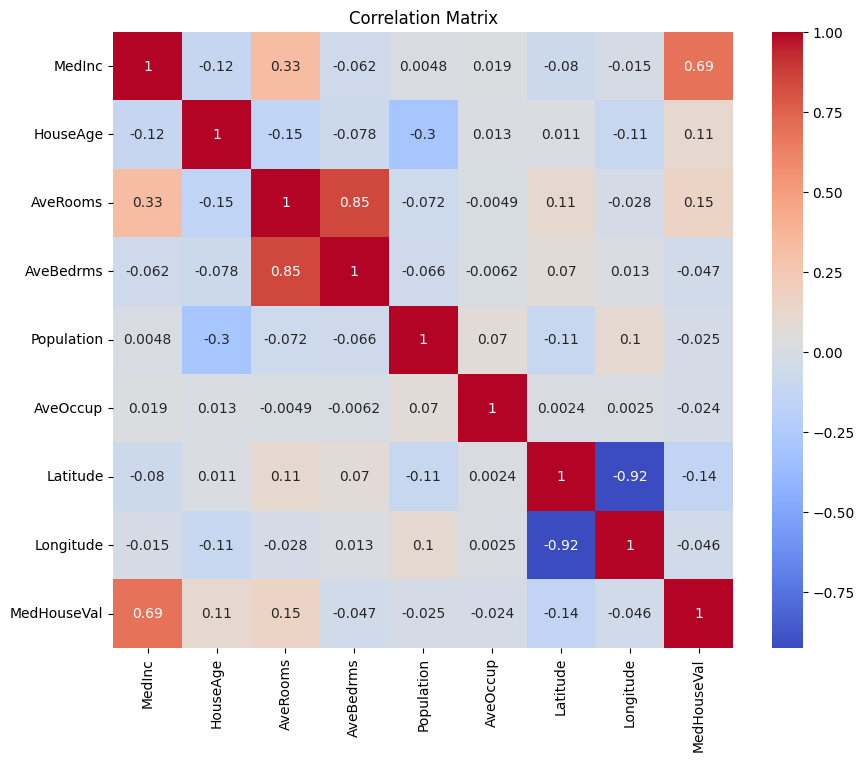

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load data
california = fetch_california_housing(as_frame=True)
df = california.frame
print(df.head())
print(df.shape)  # (20640, 9)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [3]:
# Preprocess Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.2647 - mae: 0.8327 - val_loss: 0.7924 - val_mae: 0.4683
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7523 - mae: 0.4617 - val_loss: 0.6189 - val_mae: 0.4372
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5706 - mae: 0.4425 - val_loss: 0.5037 - val_mae: 0.4326
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4917 - mae: 0.4332 - val_loss: 0.4601 - val_mae: 0.4257
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4537 - mae: 0.4284 - val_loss: 0.4414 - val_mae: 0.4180
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4283 - mae: 0.4215 - val_loss: 0.4313 - val_mae: 0.4431
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4204 - mae: 0.4212 - val_loss: 0.4054 - val_mae: 0.4192
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4052 - mae: 0.4130 - val_loss: 0.4309 - val_mae: 0.4568
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

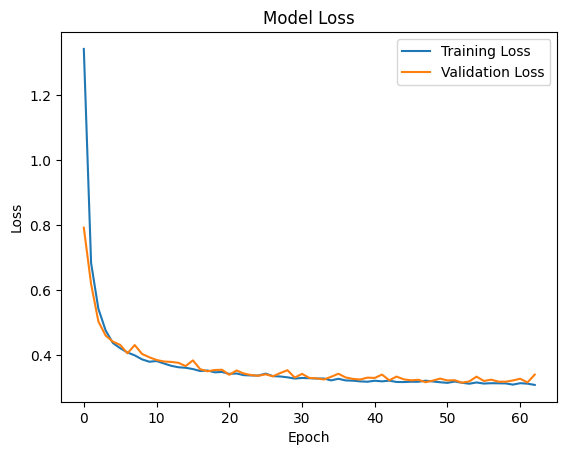

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build model
from tensorflow.keras.regularizers import l2
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {test_mae}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


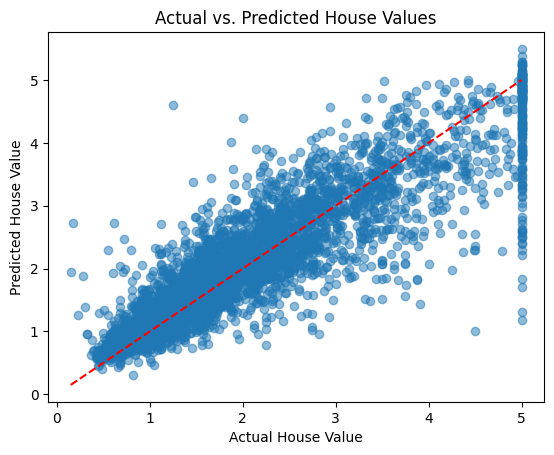

In [5]:
y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs. Predicted House Values')
plt.show()

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_mae = np.mean(np.abs(rf.predict(X_test_scaled) - y_test))
print(f"Random Forest MAE: {rf_mae}")

Random Forest MAE: 0.3274252027374032
